In [17]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [18]:
d1=pd.read_csv("forestfires.csv")

In [19]:
d1.shape

(517, 31)

In [20]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [21]:
d1.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [22]:
d1.head(20)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


In [23]:
d1.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [10]:
#Since 'month' and 'day' feature can be used for the problem, we shall drop all the remaining columns which implies the same.

In [24]:
d1.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'], axis=1,inplace=True)

In [25]:
d1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [26]:
# Investigate all the elements whithin each Feature 

for column in d1:
    unique_values = np.unique(d1[column])
    nr_values = len(unique_values)
    if nr_values <= 12:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature month is: 12 -- ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
The number of values for feature day is: 7 -- ['fri' 'mon' 'sat' 'sun' 'thu' 'tue' 'wed']
The number of values for feature FFMC is: 106
The number of values for feature DMC is: 215
The number of values for feature DC is: 219
The number of values for feature ISI is: 119
The number of values for feature temp is: 192
The number of values for feature RH is: 75
The number of values for feature wind is: 21
The number of values for feature rain is: 7 -- [0.  0.2 0.4 0.8 1.  1.4 6.4]
The number of values for feature area is: 251
The number of values for feature size_category is: 2 -- ['large' 'small']


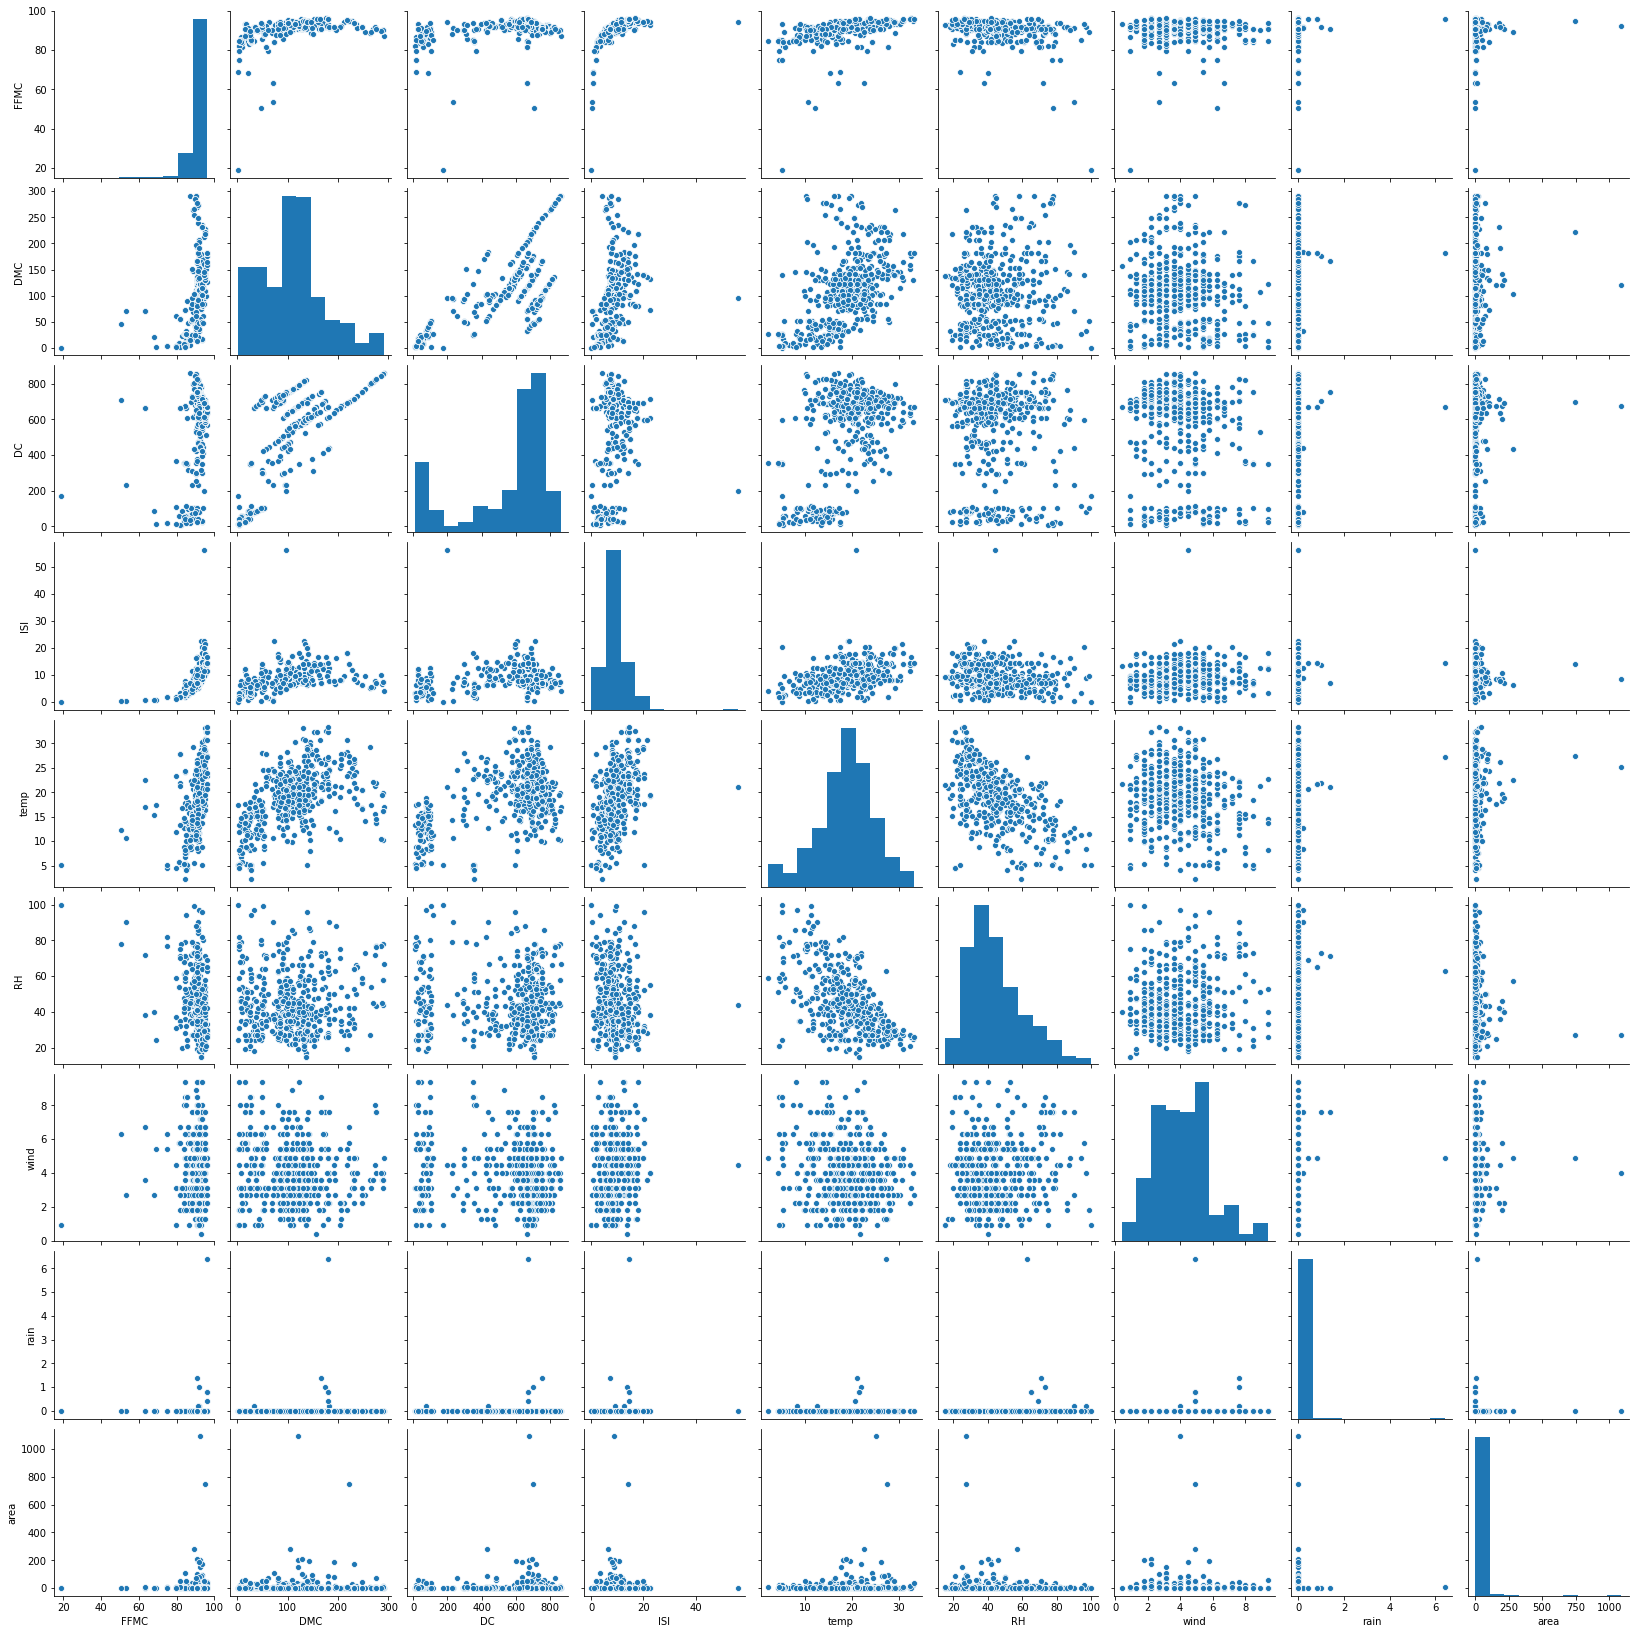

In [27]:
g = sns.pairplot(d1)

In [ ]:
# From the pairplot, we can detect outliers in few columns. Let's investigate it further

In [30]:
d1[d1['FFMC']<40]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
379,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.0,small


In [34]:
d1[d1['area']>400]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
238,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,large
415,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28,large


In [35]:
d1[d1['ISI']>40]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
22,jun,sun,94.3,96.3,200.0,56.1,21.0,44,4.5,0.0,0.0,small


In [36]:
d1[d1['rain']>2]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
499,aug,tue,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82,large


In [37]:
i = d1[((d1.FFMC < 40))].index
d1.drop(i,inplace=True)

In [38]:
d1[d1['FFMC']<40] #To check if the row is deleted

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category


In [39]:
i = d1[((d1.area > 400))].index
d1.drop(i,inplace=True)

In [40]:
i = d1[((d1.ISI > 40))].index
d1.drop(i,inplace=True)

In [41]:
i = d1[((d1.rain > 2))].index
d1.drop(i,inplace=True)

In [42]:
#Let's run the pairplot again for better graph sice the outliers are removed

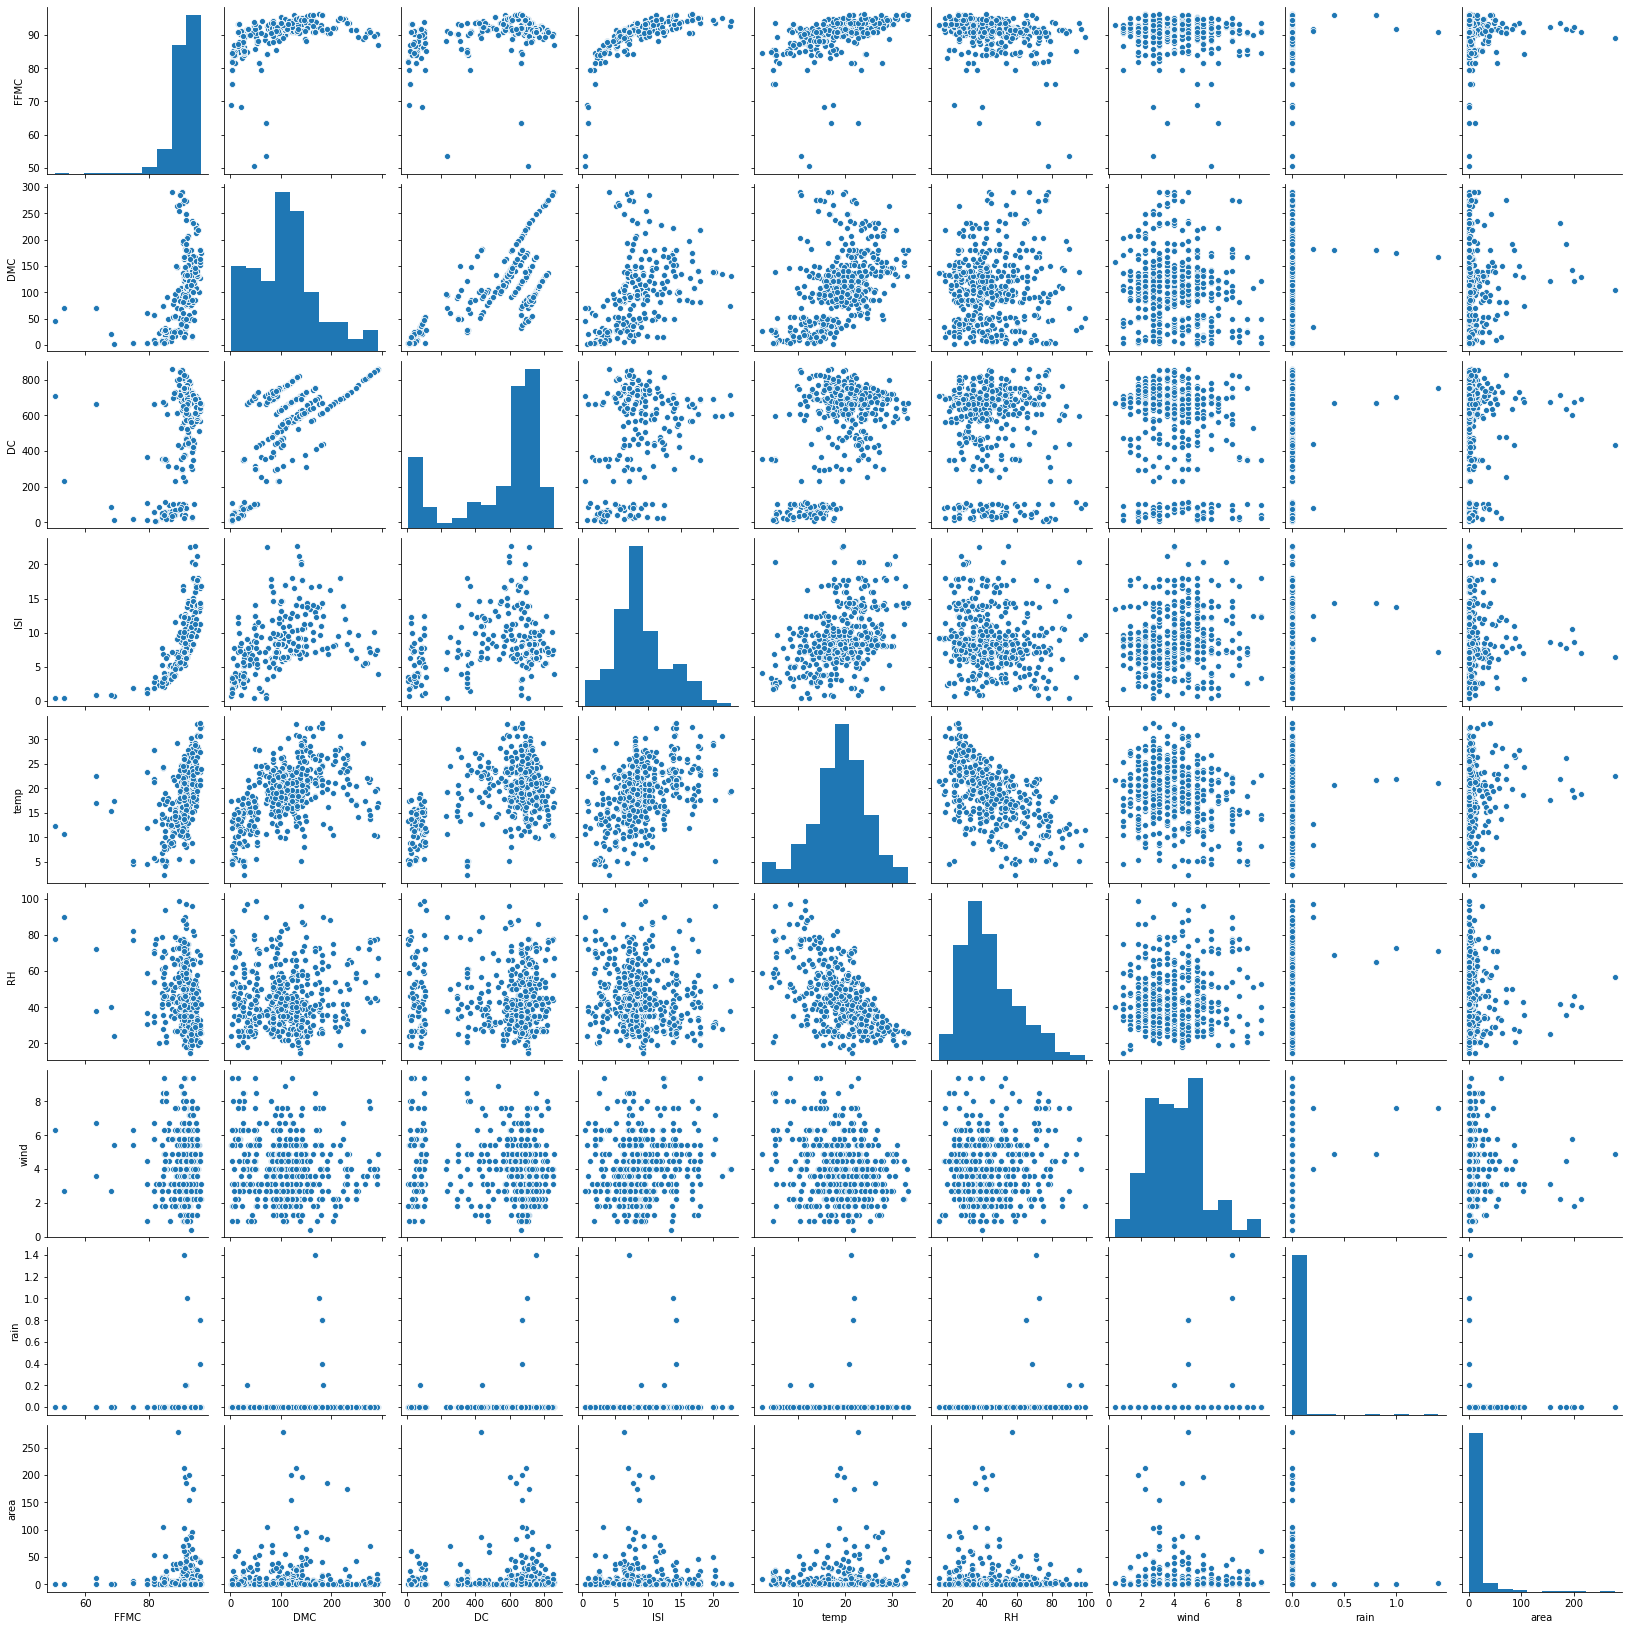

In [43]:
g = sns.pairplot(d1)

In [44]:
d1.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

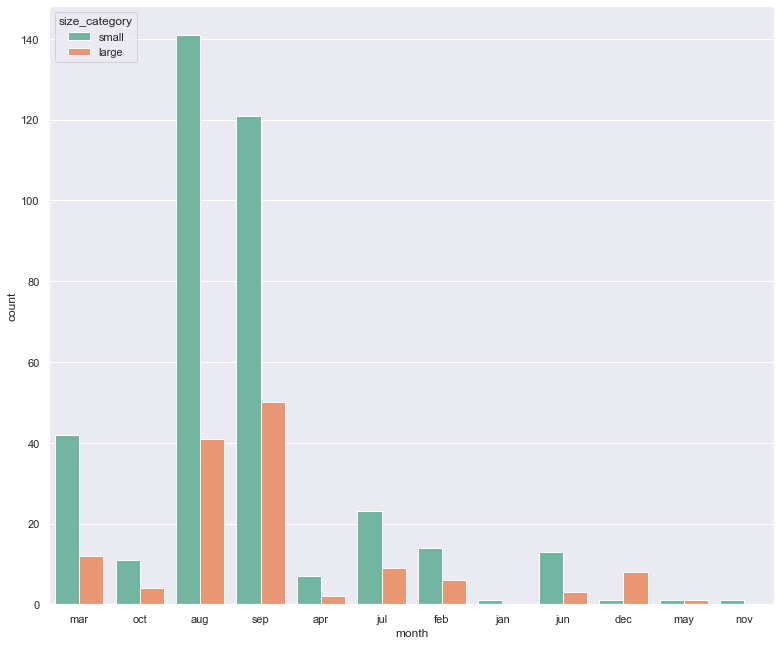

In [46]:
sns.set(rc={'figure.figsize':(13,11)})

sns.countplot(x = 'month', data = d1, palette = 'Set2', hue = 'size_category')
plt.show()

In [ ]:
# We can see that most of the forest fires are in the month of August and September

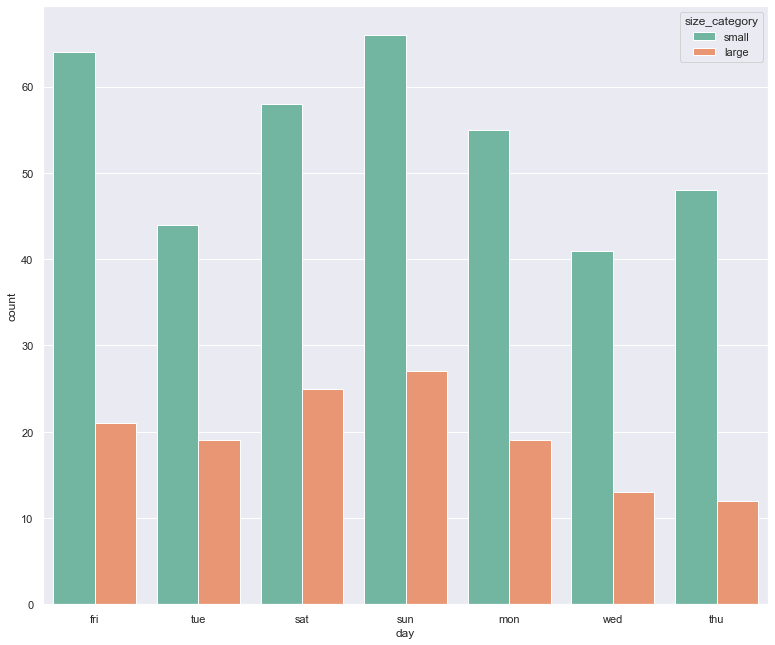

In [47]:
sns.countplot(x = 'day', data = d1, palette = 'Set2', hue = 'size_category')
plt.show()

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le=LabelEncoder()

In [48]:
label_encoders = {}
categorical_columns = ['month', 'day','size_category'] 

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    d1[column] = label_encoders[column].fit_transform(d1[column])

In [49]:
d1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [100]:
# Feature Selection phase to check for importance of different features

In [50]:
# Split the data into X & y

X = d1.drop('size_category', axis = 1).values
y = d1['size_category']

y = y.astype(int)

print(X.shape)
print(y.shape)

(512, 11)
(512,)


In [53]:
# Run a Tree-based estimators (Decision Tree in this case)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 2)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=15)

In [54]:
# Running Feature Importance
fi_col = []
fi = []

for i,column in enumerate(d1.drop('size_category', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for month is : 0.0
The feature importance for day is : 0.0
The feature importance for FFMC is : 0.0
The feature importance for DMC is : 0.0
The feature importance for DC is : 0.0
The feature importance for ISI is : 0.0
The feature importance for temp is : 0.0
The feature importance for RH is : 0.0
The feature importance for wind is : 0.0
The feature importance for rain is : 0.0
The feature importance for area is : 1.0


In [ ]:
# It shows that Area is the only imortant feature with score of 1.0
# For now, let's check how the model performs with all features

In [55]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# We will use the Support Vector classifier for this problem
from sklearn.svm import SVC
model= SVC()

In [57]:
model.fit(X_train,y_train)

SVC()

In [58]:
model.score(X_test,y_test)

0.7961165048543689

In [59]:
#We have an Accuracy score of 79.6 Percent